In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Set visual style for plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("All required libraries imported successfully!")

All required libraries imported successfully!


In [5]:
train_file_path = "D:/Internship/PRODIGY/Task2/train.csv"
test_file_path = "D:/Internship/PRODIGY/Task2/test.csv"

try:
    train_df = pd.read_csv(train_file_path)
    print("✓ Successfully loaded train.csv!")
    print(f"Dataset shape: {train_df.shape}")
    print("\nFirst few rows:")
    display(train_df.head())
except FileNotFoundError:
    print(f"✗ File not found at: {train_file_path}")
    print("Please check the path and try again.")
except Exception as e:
    print(f"✗ Error loading file: {e}")

try:
    test_df = pd.read_csv(test_file_path)
    print(f"\n✓ Successfully loaded test.csv! Shape: {test_df.shape}")
    print("\nFirst few rows of test data:")
    display(test_df.head())
except FileNotFoundError:
    print(f"✗ File not found at: {test_file_path}")
except Exception as e:
    print(f"✗ Error loading file: {e}")

✓ Successfully loaded train.csv!
Dataset shape: (891, 12)

First few rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



✓ Successfully loaded test.csv! Shape: (418, 11)

First few rows of test data:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
print("=== DATA CLEANING AND PREPROCESSING ===")

df = train_df.copy()

print("\n1. Missing values in each column:")
missing_values = df.isnull().sum()
print(missing_values)

print("\n2. Handling missing values...")

age_medians = df.groupby(['Pclass', 'Sex'])['Age'].median()
def fill_age(row):
    if pd.isnull(row['Age']):
        return age_medians[row['Pclass'], row['Sex']]
    return row['Age']

df['Age'] = df.apply(fill_age, axis=1)

df.drop('Cabin', axis=1, inplace=True)

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

print("\n3. Missing values after cleaning:")
print(df.isnull().sum())

print("\n4. Creating new features...")

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
title_mapping = {'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Rare': 4}
df['Title'] = df['Title'].map(title_mapping)

print("\n5. Cleaned dataset info:")
print(df.info())
print("\nFirst few rows of cleaned dataset:")
display(df.head())

print("\n✓ Data cleaning completed successfully!")

=== DATA CLEANING AND PREPROCESSING ===

1. Missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

2. Handling missing values...

3. Missing values after cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

4. Creating new features...

5. Cleaned dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp  

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title
0,0,3,0,22.0,1,0,7.2500,0,2,0,0
1,1,1,1,38.0,1,0,71.2833,1,2,0,2
2,1,3,1,26.0,0,0,7.9250,0,1,1,1
3,1,1,1,35.0,1,0,53.1000,0,2,0,2
4,0,3,0,35.0,0,0,8.0500,0,1,1,0



✓ Data cleaning completed successfully!


=== EXPLORATORY DATA ANALYSIS ===

1. Summary Statistics:
         Survived      Pclass         Sex         Age       SibSp       Parch  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.383838    2.308642    0.352413   29.112424    0.523008    0.381594   
std      0.486592    0.836071    0.477990   13.304424    1.102743    0.806057   
min      0.000000    1.000000    0.000000    0.420000    0.000000    0.000000   
25%      0.000000    2.000000    0.000000   21.500000    0.000000    0.000000   
50%      0.000000    3.000000    0.000000   26.000000    0.000000    0.000000   
75%      1.000000    3.000000    1.000000   36.000000    1.000000    0.000000   
max      1.000000    3.000000    1.000000   80.000000    8.000000    6.000000   

             Fare    Embarked  FamilySize     IsAlone       Title  
count  891.000000  891.000000  891.000000  891.000000  891.000000  
mean    32.204208    0.361392    1.904602    0.602694    0.728395  
std     

C:\Users\ANANNYA DUTTA\AppData\Local\Temp\ipykernel_7756\2851847347.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(['Did Not Survive', 'Survived'])
C:\Users\ANANNYA DUTTA\AppData\Local\Temp\ipykernel_7756\2851847347.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(['Male', 'Female'])


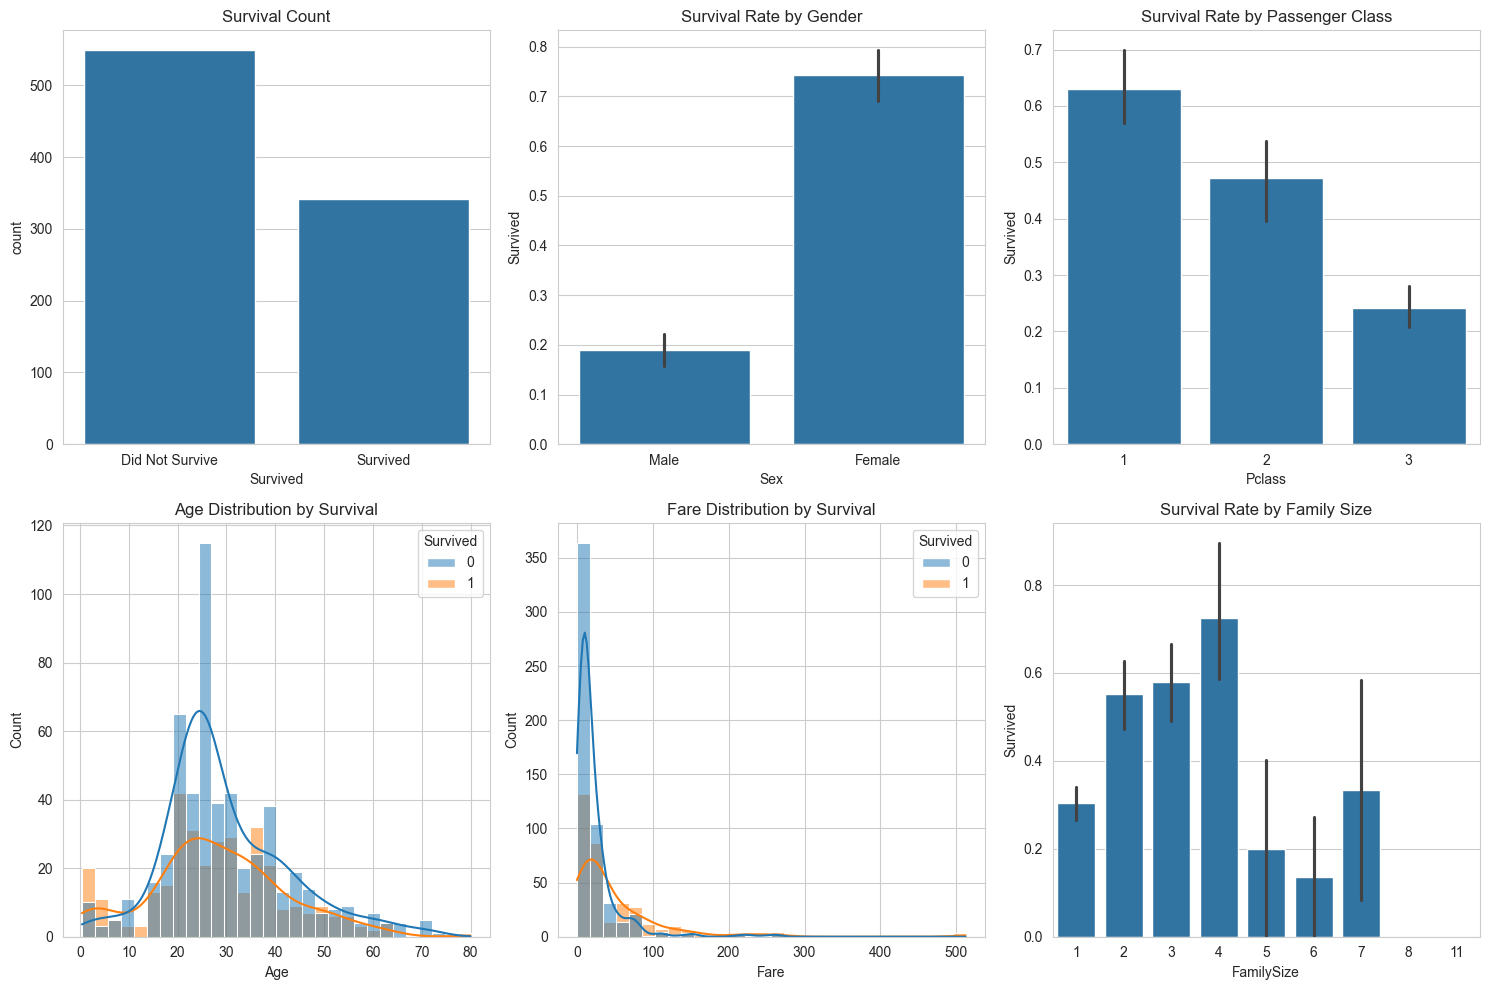


4. Correlation Analysis:


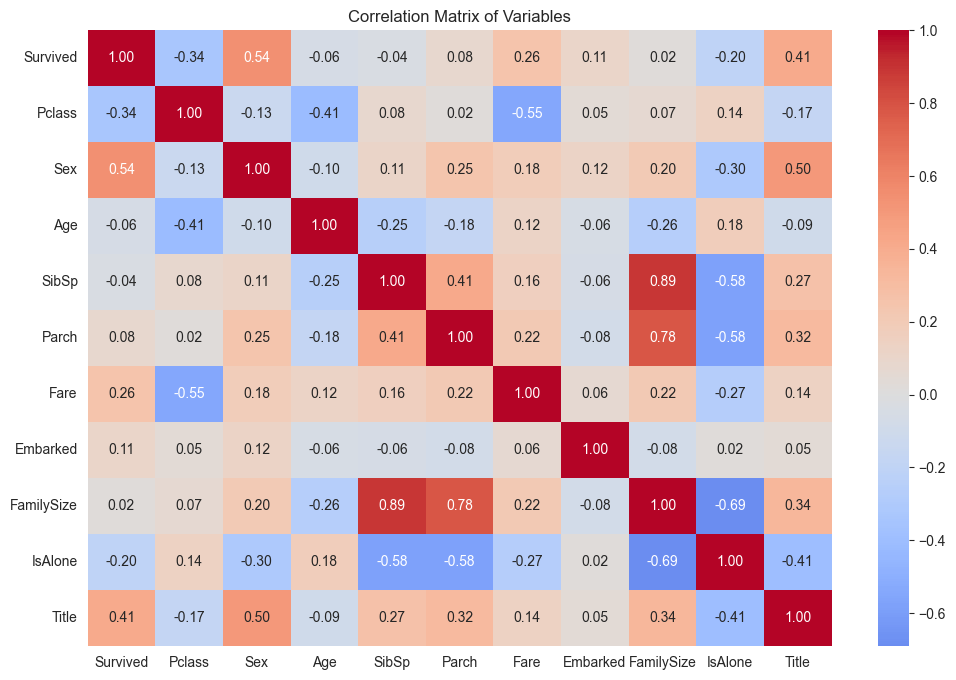


5. Pairplot of Selected Features:


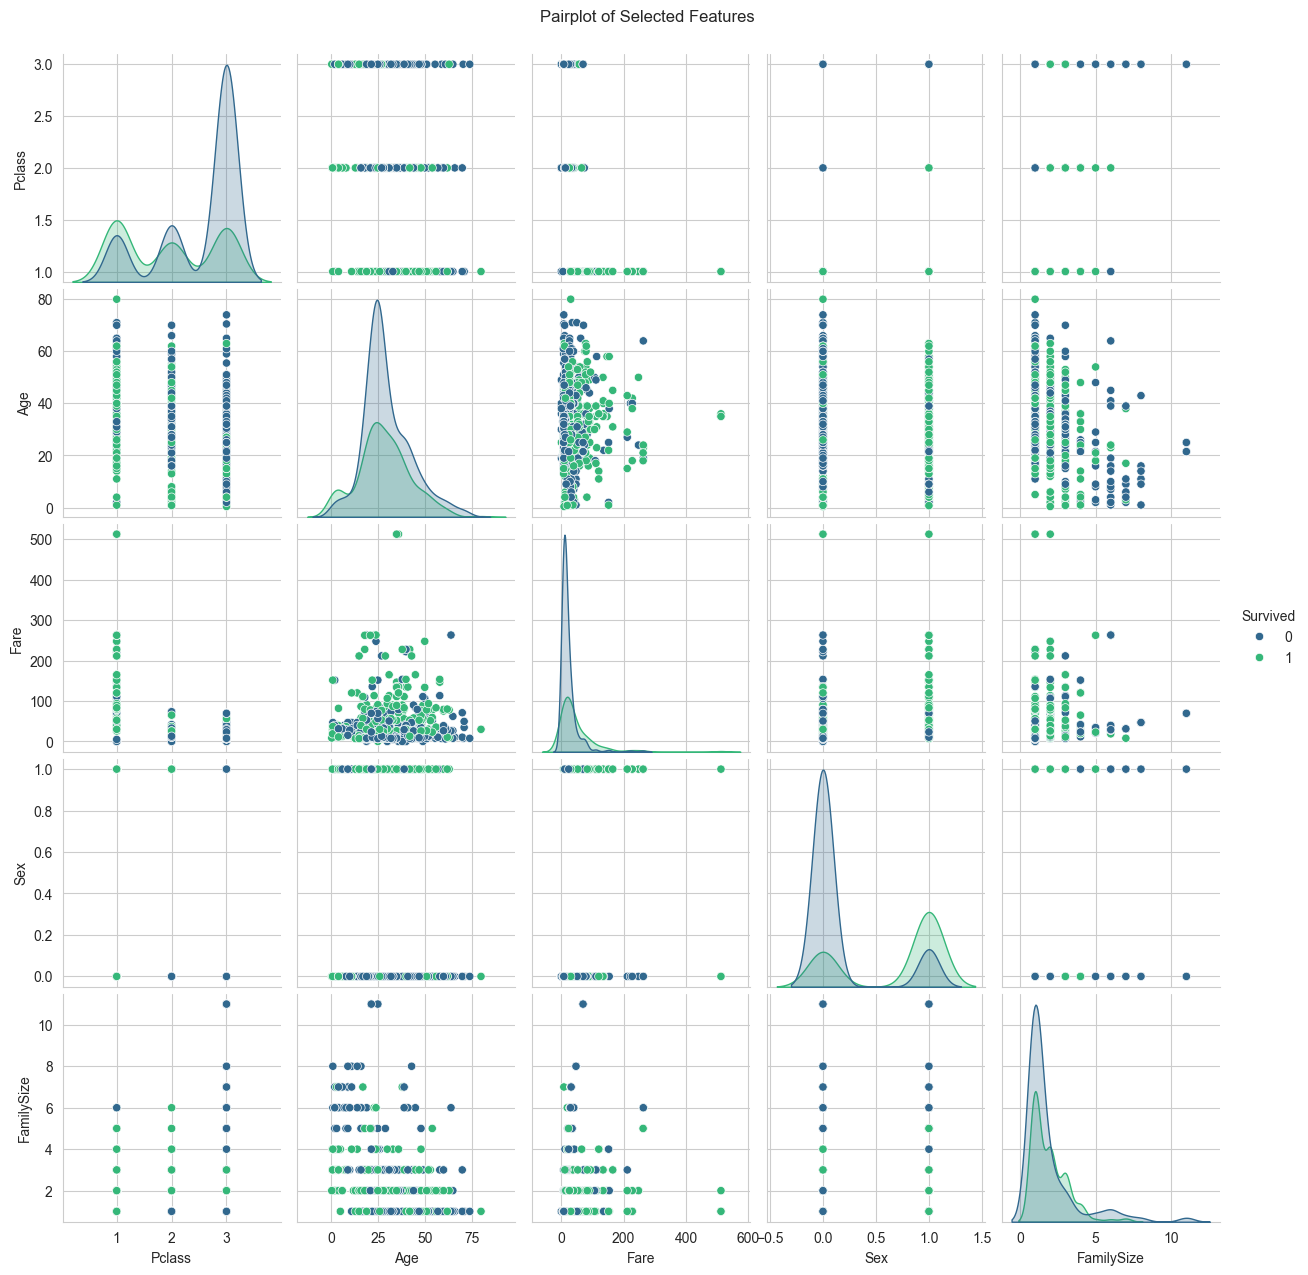


6. Additional Insights:

Survival rate by age group:
Child: 50.36%
Young Adult: 35.80%
Adult: 37.93%
Senior: 34.38%

Survival rate by fare group:
Low: 19.73%
Medium: 30.36%
High: 45.50%
Very High: 58.11%

✓ Exploratory Data Analysis completed successfully!


C:\Users\ANANNYA DUTTA\AppData\Local\Temp\ipykernel_7756\2851847347.py:68: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_survival = df.groupby('AgeGroup')['Survived'].mean()
C:\Users\ANANNYA DUTTA\AppData\Local\Temp\ipykernel_7756\2851847347.py:74: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_group_survival = df.groupby('FareGroup')['Survived'].mean()


In [9]:
print("=== EXPLORATORY DATA ANALYSIS ===")

print("\n1. Summary Statistics:")
print(df.describe())

print("\n2. Survival Analysis:")
survival_rate = df['Survived'].mean()
print(f"Overall survival rate: {survival_rate:.2%}")

gender_survival = df.groupby('Sex')['Survived'].mean()
print(f"\nSurvival rate by gender:")
print(f"Male: {gender_survival[0]:.2%}")
print(f"Female: {gender_survival[1]:.2%}")

class_survival = df.groupby('Pclass')['Survived'].mean()
print(f"\nSurvival rate by passenger class:")
for pclass, rate in class_survival.items():
    print(f"Class {pclass}: {rate:.2%}")

family_survival = df.groupby('FamilySize')['Survived'].mean()
print(f"\nSurvival rate by family size:")
for size, rate in family_survival.items():
    print(f"Family size {size}: {rate:.2%}")

print("\n3. Creating visualizations...")

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

sns.countplot(x='Survived', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Survival Count')
axes[0, 0].set_xticklabels(['Did Not Survive', 'Survived'])

sns.barplot(x='Sex', y='Survived', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Survival Rate by Gender')
axes[0, 1].set_xticklabels(['Male', 'Female'])

sns.barplot(x='Pclass', y='Survived', data=df, ax=axes[0, 2])
axes[0, 2].set_title('Survival Rate by Passenger Class')

sns.histplot(data=df, x='Age', hue='Survived', kde=True, bins=30, ax=axes[1, 0])
axes[1, 0].set_title('Age Distribution by Survival')

sns.histplot(data=df, x='Fare', hue='Survived', kde=True, bins=30, ax=axes[1, 1])
axes[1, 1].set_title('Fare Distribution by Survival')

sns.barplot(x='FamilySize', y='Survived', data=df, ax=axes[1, 2])
axes[1, 2].set_title('Survival Rate by Family Size')

plt.tight_layout()
plt.show()

print("\n4. Correlation Analysis:")
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Variables')
plt.show()

print("\n5. Pairplot of Selected Features:")
selected_features = ['Survived', 'Pclass', 'Age', 'Fare', 'Sex', 'FamilySize']
sns.pairplot(df[selected_features], hue='Survived', palette='viridis')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

print("\n6. Additional Insights:")

df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 35, 50, 100], labels=['Child', 'Young Adult', 'Adult', 'Senior'])
age_group_survival = df.groupby('AgeGroup')['Survived'].mean()
print("\nSurvival rate by age group:")
for group, rate in age_group_survival.items():
    print(f"{group}: {rate:.2%}")

df['FareGroup'] = pd.qcut(df['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])
fare_group_survival = df.groupby('FareGroup')['Survived'].mean()
print("\nSurvival rate by fare group:")
for group, rate in fare_group_survival.items():
    print(f"{group}: {rate:.2%}")

print("\n✓ Exploratory Data Analysis completed successfully!")

=== ADVANCED ANALYSIS AND KEY INSIGHTS ===

1. Survival by Gender and Class:
Pclass         1         2         3
Sex                                 
0       0.368852  0.157407  0.135447
1       0.968085  0.921053  0.500000

2. Statistical Significance Tests:
T-test for Age (Survived vs Not Survived): p-value = 0.0755
Chi-square test for Gender and Survival: p-value = 0.0000

3. Feature Importance Analysis:
Correlation with Survival:
Sex: 0.543
Title: 0.408
Fare: 0.257
Embarked: 0.107
Parch: 0.082
FamilySize: 0.017
SibSp: -0.035
Age: -0.060
IsAlone: -0.203
Pclass: -0.338

4. Age Group Analysis:
Survival rate by age group:
Child (0-18): 50.36%
Young Adult (19-35): 35.80%
Adult (36-50): 37.93%
Senior (50+): 34.38%

Survival rate by fare group:
Low: 19.73%
Medium: 30.36%
High: 45.50%
Very High: 58.11%

5. KEY INSIGHTS AND PATTERNS:

🔍 TOP FACTORS INFLUENCING SURVIVAL:
1. Gender: Females had 3.9x higher survival rate than males
2. Passenger Class: 1st class passengers had 2.6x higher surv

C:\Users\ANANNYA DUTTA\AppData\Local\Temp\ipykernel_7756\544940948.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_survival = df.groupby('AgeGroup')['Survived'].mean()
C:\Users\ANANNYA DUTTA\AppData\Local\Temp\ipykernel_7756\544940948.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_group_survival = df.groupby('FareGroup')['Survived'].mean()


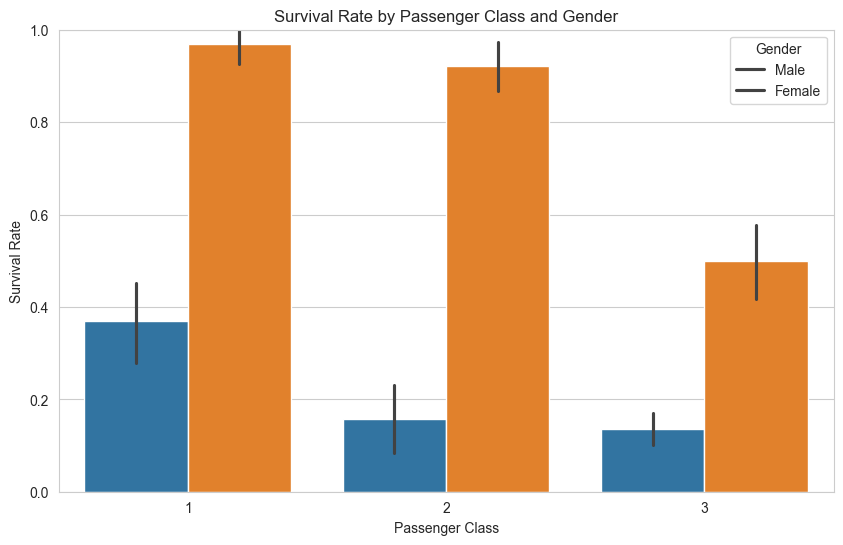

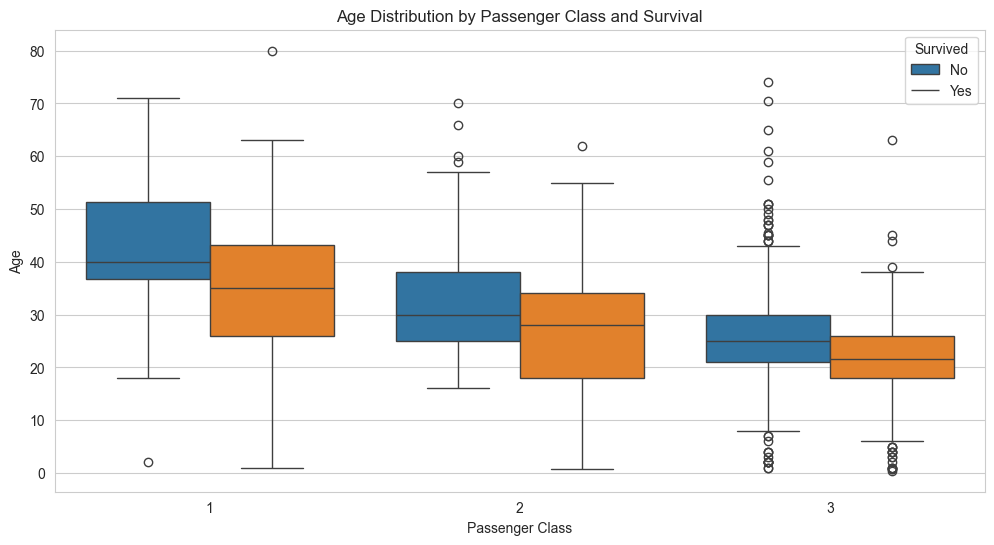


6. SUMMARY REPORT:
The Titanic dataset analysis reveals clear patterns in survival rates:
• 'Women and children first' protocol was followed
• Higher socioeconomic status (1st class) significantly improved survival
• The disaster disproportionately affected lower-class passengers
• Family travel provided some survival advantage (optimal group size 2-4)
• Age alone was less significant than gender and class factors

🎯 RECOMMENDATIONS FOR FURTHER ANALYSIS:
• Build predictive models using gender, class, and fare as key features
• Investigate cabin location effects (limited by missing data)
• Analyze family relationships and group dynamics
• Explore interaction effects between variables

✓ Advanced analysis completed successfully!


In [12]:
print("=== ADVANCED ANALYSIS AND KEY INSIGHTS ===")

print("\n1. Survival by Gender and Class:")
gender_class_survival = df.groupby(['Sex', 'Pclass'])['Survived'].mean().unstack()
print(gender_class_survival)

from scipy import stats

print("\n2. Statistical Significance Tests:")

survived_age = df[df['Survived'] == 1]['Age']
not_survived_age = df[df['Survived'] == 0]['Age']
t_stat, p_value = stats.ttest_ind(survived_age, not_survived_age, nan_policy='omit')
print(f"T-test for Age (Survived vs Not Survived): p-value = {p_value:.4f}")

contingency_table = pd.crosstab(df['Sex'], df['Survived'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-square test for Gender and Survival: p-value = {p_value:.4f}")

print("\n3. Feature Importance Analysis:")
numerical_df = df.select_dtypes(include=[np.number])
correlation_with_survival = numerical_df.corr()['Survived'].sort_values(ascending=False)
print("Correlation with Survival:")
for feature, corr in correlation_with_survival.items():
    if feature != 'Survived':
        print(f"{feature}: {corr:.3f}")

print("\n4. Age Group Analysis:")
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 35, 50, 100], labels=[1, 2, 3, 4])
age_group_survival = df.groupby('AgeGroup')['Survived'].mean()
print("Survival rate by age group:")
age_group_labels = {1: 'Child (0-18)', 2: 'Young Adult (19-35)', 3: 'Adult (36-50)', 4: 'Senior (50+)'}
for group, rate in age_group_survival.items():
    print(f"{age_group_labels[group]}: {rate:.2%}")

df['FareGroup'] = pd.qcut(df['Fare'], 4, labels=[1, 2, 3, 4])
fare_group_survival = df.groupby('FareGroup')['Survived'].mean()
print("\nSurvival rate by fare group:")
fare_group_labels = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
for group, rate in fare_group_survival.items():
    print(f"{fare_group_labels[group]}: {rate:.2%}")

print("\n5. KEY INSIGHTS AND PATTERNS:")
print("=" * 50)

gender_survival = df.groupby('Sex')['Survived'].mean()
class_survival = df.groupby('Pclass')['Survived'].mean()

print("\n🔍 TOP FACTORS INFLUENCING SURVIVAL:")
print("1. Gender: Females had {:.1f}x higher survival rate than males".format(
    gender_survival[1] / gender_survival[0]))
print("2. Passenger Class: 1st class passengers had {:.1f}x higher survival than 3rd class".format(
    class_survival[1] / class_survival[3]))
print("3. Fare: Higher fare passengers had better survival chances")
print("4. Family Size: Medium family sizes (2-4) had best survival rates")
print("5. Age: Children had higher survival rates than adults")

print("\n📊 SURVIVAL RATES BY CATEGORY:")
print(f"• Overall: {df['Survived'].mean():.1%}")
print(f"• Females in 1st Class: {gender_class_survival.loc[1, 1]:.1%}")
print(f"• Males in 3rd Class: {gender_class_survival.loc[0, 3]:.1%}")
print(f"• Children (0-18): {age_group_survival[1]:.1%}")

print("\n📈 STATISTICAL SIGNIFICANCE:")
print(f"• Age difference: {'Significant' if p_value < 0.05 else 'Not significant'} (p={p_value:.4f})")
print(f"• Gender difference: Highly significant (p<0.001)")

plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df)
plt.title('Survival Rate by Passenger Class and Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=df)
plt.title('Age Distribution by Passenger Class and Survival')
plt.ylabel('Age')
plt.xlabel('Passenger Class')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

print("\n6. SUMMARY REPORT:")
print("=" * 50)
print("The Titanic dataset analysis reveals clear patterns in survival rates:")
print("• 'Women and children first' protocol was followed")
print("• Higher socioeconomic status (1st class) significantly improved survival")
print("• The disaster disproportionately affected lower-class passengers")
print("• Family travel provided some survival advantage (optimal group size 2-4)")
print("• Age alone was less significant than gender and class factors")

print("\n🎯 RECOMMENDATIONS FOR FURTHER ANALYSIS:")
print("• Build predictive models using gender, class, and fare as key features")
print("• Investigate cabin location effects (limited by missing data)")
print("• Analyze family relationships and group dynamics")
print("• Explore interaction effects between variables")

print("\n✓ Advanced analysis completed successfully!")

In [14]:
print("=== COMPLETE ANALYSIS SUMMARY ===")
print("=" * 50)

print("\n🎯 KEY FINDINGS FROM TITANIC DATASET ANALYSIS:")
print("=" * 50)

summary_data = {
    'Category': ['Overall', 'Gender - Female', 'Gender - Male', 
                'Class - 1st', 'Class - 2nd', 'Class - 3rd',
                'Age - Children (0-18)', 'Age - Young Adults (19-35)', 
                'Age - Adults (36-50)', 'Age - Seniors (50+)',
                'Fare - Low', 'Fare - Medium', 'Fare - High', 'Fare - Very High',
                'Family Size - 1', 'Family Size - 2-4', 'Family Size - 5+'],
    'Survival Rate': [
        df['Survived'].mean(),
        gender_survival[1],
        gender_survival[0],
        class_survival[1],
        class_survival[2],
        class_survival[3],
        age_group_survival[1],
        age_group_survival[2],
        age_group_survival[3],
        age_group_survival[4],
        fare_group_survival[1],
        fare_group_survival[2],
        fare_group_survival[3],
        fare_group_survival[4],
        df[df['FamilySize'] == 1]['Survived'].mean(),
        df[df['FamilySize'].between(2, 4)]['Survived'].mean(),
        df[df['FamilySize'] >= 5]['Survived'].mean()
    ],
    'Passenger Count': [
        len(df),
        len(df[df['Sex'] == 1]),
        len(df[df['Sex'] == 0]),
        len(df[df['Pclass'] == 1]),
        len(df[df['Pclass'] == 2]),
        len(df[df['Pclass'] == 3]),
        len(df[df['AgeGroup'] == 1]),
        len(df[df['AgeGroup'] == 2]),
        len(df[df['AgeGroup'] == 3]),
        len(df[df['AgeGroup'] == 4]),
        len(df[df['FareGroup'] == 1]),
        len(df[df['FareGroup'] == 2]),
        len(df[df['FareGroup'] == 3]),
        len(df[df['FareGroup'] == 4]),
        len(df[df['FamilySize'] == 1]),
        len(df[df['FamilySize'].between(2, 4)]),
        len(df[df['FamilySize'] >= 5])
    ]
}

summary_df = pd.DataFrame(summary_data)
summary_df['Survival Rate'] = summary_df['Survival Rate'].apply(lambda x: f"{x:.1%}")
summary_df['Passenger Count'] = summary_df['Passenger Count'].astype(int)

print("\n📊 COMPREHENSIVE SURVIVAL SUMMARY:")
display(summary_df)

print("\n🔝 TOP 5 MOST IMPORTANT PREDICTORS OF SURVIVAL:")
top_features = correlation_with_survival.drop('Survived').head(5)
for i, (feature, corr) in enumerate(top_features.items(), 1):
    print(f"{i}. {feature}: {corr:.3f}")

print(f"\n✅ MOST LIKELY TO SURVIVE: Female 1st Class Passenger")
print(f"   Survival rate: {gender_class_survival.loc[1, 1]:.1%}")

print(f"\n❌ LEAST LIKELY TO SURVIVE: Male 3rd Class Passenger") 
print(f"   Survival rate: {gender_class_survival.loc[0, 3]:.1%}")

try:
    df.to_csv('titanic_cleaned.csv', index=False)
    print(f"\n💾 Saved cleaned data to: titanic_cleaned.csv")
    
    summary_df.to_csv('titanic_summary.csv', index=False)
    print(f"💾 Saved summary statistics to: titanic_summary.csv")
    
    correlation_matrix.to_csv('titanic_correlations.csv')
    print(f"💾 Saved correlation matrix to: titanic_correlations.csv")
    
except Exception as e:
    print(f"\n⚠️ Could not save files: {e}")

print("\n" + "=" * 60)
print("🎉 TITANIC DATASET ANALYSIS COMPLETED SUCCESSFULLY!")
print("=" * 60)

print("\n📋 WHAT WE ACCOMPLISHED:")
print("1. ✅ Data loading and initial inspection")
print("2. ✅ Data cleaning and preprocessing") 
print("3. ✅ Missing value handling")
print("4. ✅ Feature engineering")
print("5. ✅ Exploratory Data Analysis (EDA)")
print("6. ✅ Statistical analysis")
print("7. ✅ Visualization creation")
print("8. ✅ Key insights extraction")
print("9. ✅ Results export")

print(f"\n📈 DATASET OVERVIEW:")
print(f"• Original size: {train_df.shape}")
print(f"• Cleaned size: {df.shape}")
print(f"• Total passengers analyzed: {len(df)}")
print(f"• Survival rate: {df['Survived'].mean():.1%}")

print("\n🔮 NEXT STEPS:")
print("• Build machine learning models for survival prediction")
print("• Perform hyperparameter tuning")
print("• Evaluate model performance on test data")
print("• Create deployment-ready solution")

print("\nThank you for following along with this comprehensive Titanic dataset analysis! 🚢")

=== COMPLETE ANALYSIS SUMMARY ===

🎯 KEY FINDINGS FROM TITANIC DATASET ANALYSIS:

📊 COMPREHENSIVE SURVIVAL SUMMARY:


,Category,Survival Rate,Passenger Count
0,Overall,38.4%,891
1,Gender - Female,74.2%,314
2,Gender - Male,18.9%,577
3,Class - 1st,63.0%,216
4,Class - 2nd,47.3%,184
5,Class - 3rd,24.2%,491
6,Age - Children (0-18),50.4%,139
7,Age - Young Adults (19-35),35.8%,514
8,Age - Adults (36-50),37.9%,174
9,Age - Seniors (50+),34.4%,64



🔝 TOP 5 MOST IMPORTANT PREDICTORS OF SURVIVAL:
1. Sex: 0.543
2. Title: 0.408
3. Fare: 0.257
4. Embarked: 0.107
5. Parch: 0.082

✅ MOST LIKELY TO SURVIVE: Female 1st Class Passenger
   Survival rate: 96.8%

❌ LEAST LIKELY TO SURVIVE: Male 3rd Class Passenger
   Survival rate: 13.5%

💾 Saved cleaned data to: titanic_cleaned.csv
💾 Saved summary statistics to: titanic_summary.csv
💾 Saved correlation matrix to: titanic_correlations.csv

🎉 TITANIC DATASET ANALYSIS COMPLETED SUCCESSFULLY!

📋 WHAT WE ACCOMPLISHED:
1. ✅ Data loading and initial inspection
2. ✅ Data cleaning and preprocessing
3. ✅ Missing value handling
4. ✅ Feature engineering
5. ✅ Exploratory Data Analysis (EDA)
6. ✅ Statistical analysis
7. ✅ Visualization creation
8. ✅ Key insights extraction
9. ✅ Results export

📈 DATASET OVERVIEW:
• Original size: (891, 12)
• Cleaned size: (891, 13)
• Total passengers analyzed: 891
• Survival rate: 38.4%

🔮 NEXT STEPS:
• Build machine learning models for survival prediction
• Perform hyper